In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the dataset

In [15]:
file_path = '/Users/aniketsharma/Documents/Bike Sharing/day (2).csv'
data = pd.read_csv(file_path)

In [16]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
#Converting 'dteday' to datetime format

In [19]:
data['dteday'] = pd.to_datetime(data['dteday'],format='%d-%m-%Y')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
#Mapping Categorical Variables Based On The Data Dictionary

In [21]:
data['season'] = data['season'].map({1: 'spring', 2:'summer', 3: 'fall', 4: 'winter'})
data['yr'] = data['yr'].map({0:'2018', 1:'2019'})
data['holiday'] = data['holiday'].map({0:'No', 1: 'Yes'})
data['workingday'] = data['workingday'].map({0: 'No', 1:'Yes'})
data['weathersit'] = data['weathersit'].map({
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog'
})

In [ ]:
#Defineing The target Variable and the feature set

In [22]:
X = data.drop(columns = ['instant','dteday','casual','registered','cnt'])
y = data['cnt']

In [ ]:
#Creating Dummy Values for categorical variables value more then 2

In [23]:
X = pd.get_dummies(X, columns=['season','mnth','weekday','weathersit','yr','holiday','workingday'],drop_first=True)

In [ ]:
#Adding Target Variable Back For Analysis

In [33]:
data_encoded = pd.concat([X, y], axis=1)

In [ ]:
#UNIVARIATE ANALYSIS 

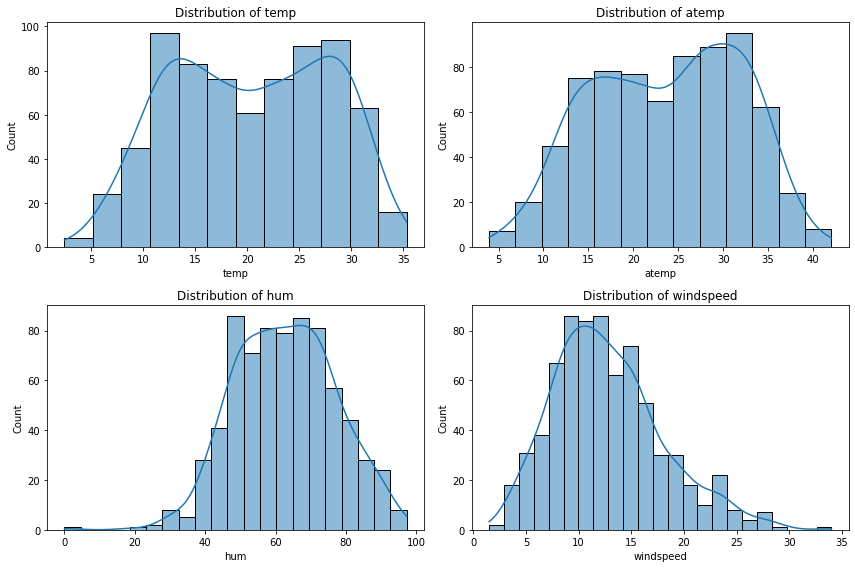

In [34]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(['temp', 'atemp', 'hum', 'windspeed']):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

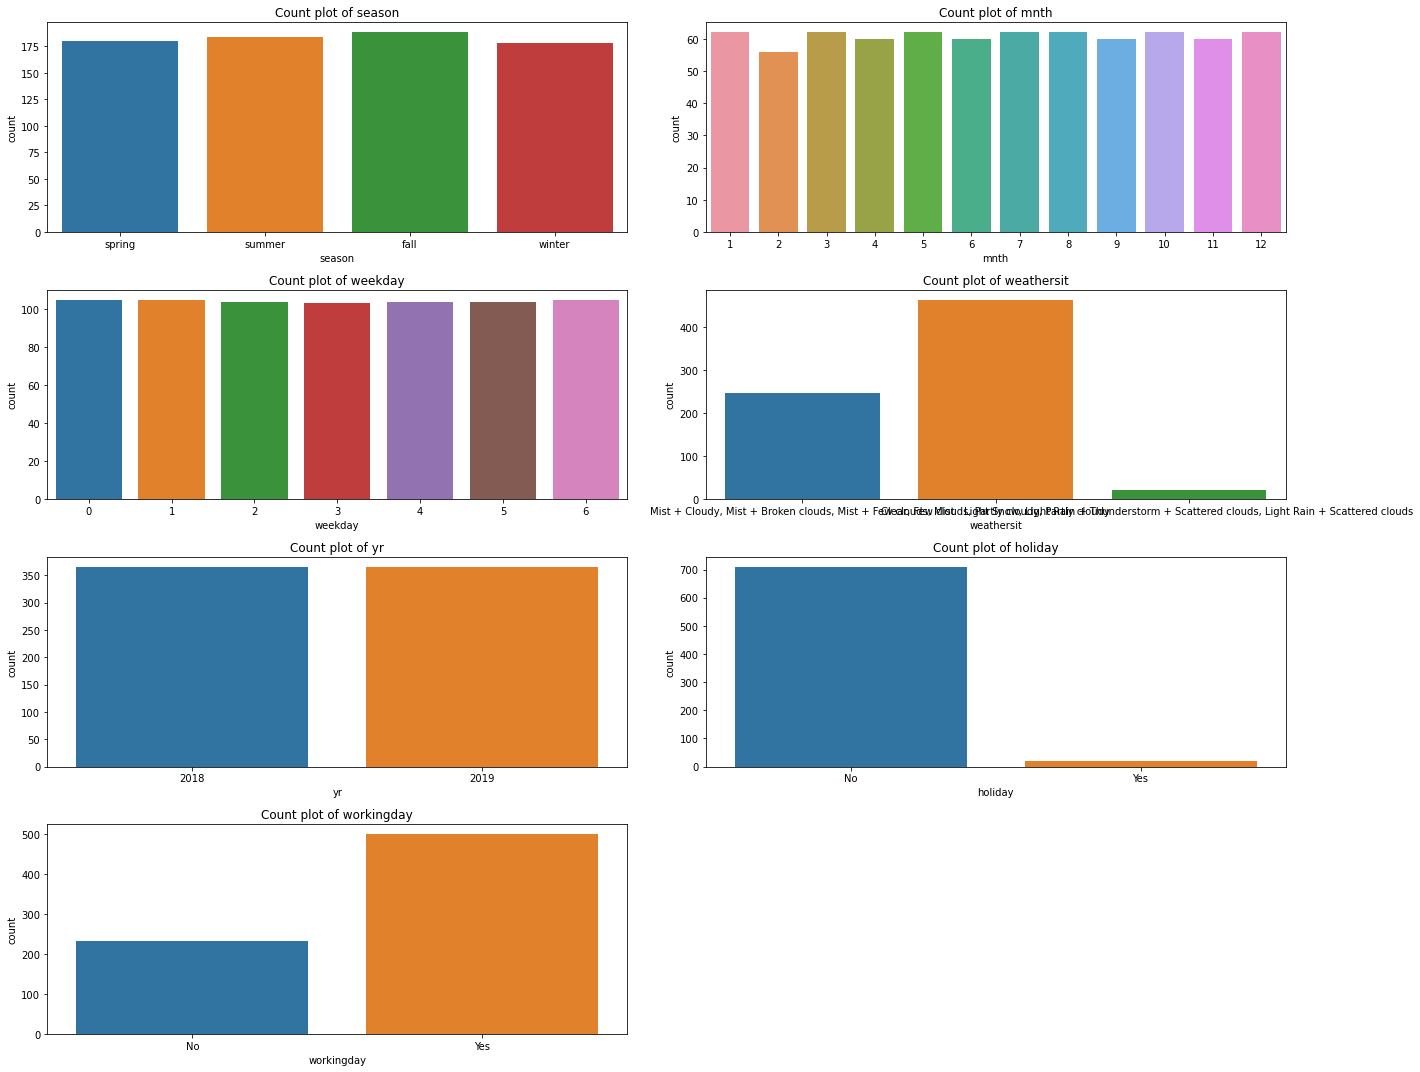

In [35]:
categorical_columns_original = ['season', 'mnth', 'weekday', 'weathersit', 'yr', 'holiday', 'workingday']

plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns_original):
    plt.subplot(4, 2, i+1)
    sns.countplot(data=data, x=column)
    plt.title(f'Count plot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
#BIVARIATE ANALYSIS

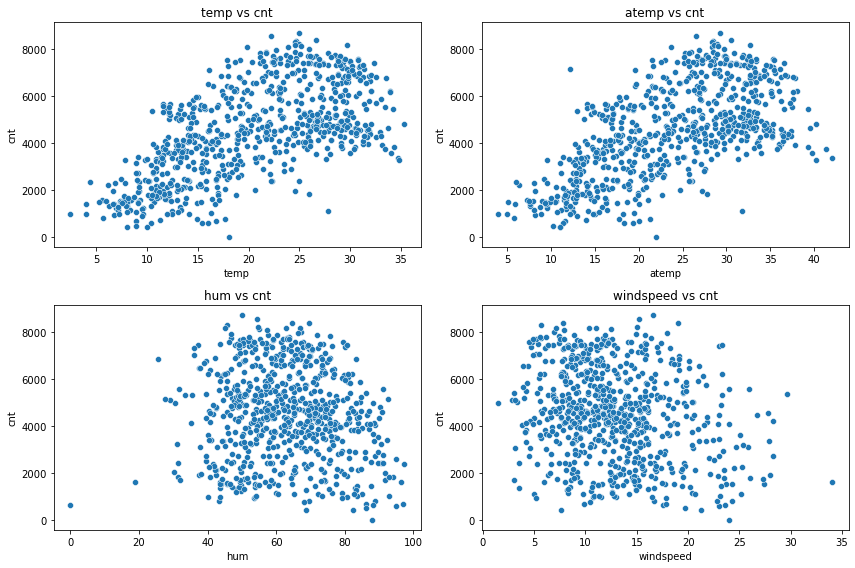

In [36]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(['temp', 'atemp', 'hum', 'windspeed']):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=data, x=column, y='cnt')
    plt.title(f'{column} vs cnt')
plt.tight_layout()
plt.show()

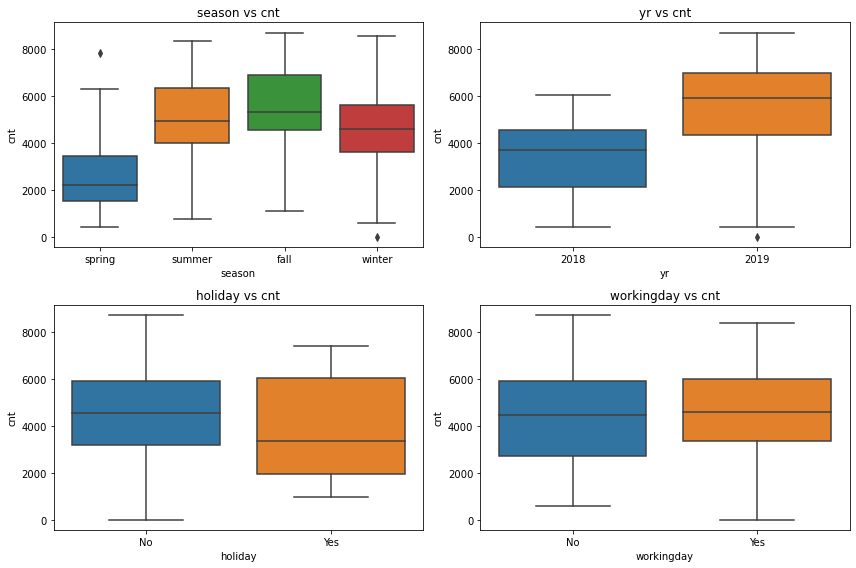

In [37]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(['season', 'yr', 'holiday', 'workingday']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=data, x=column, y='cnt')
    plt.title(f'{column} vs cnt')
plt.tight_layout()
plt.show()

In [ ]:
#MULTIVARIATE ANALYSIS

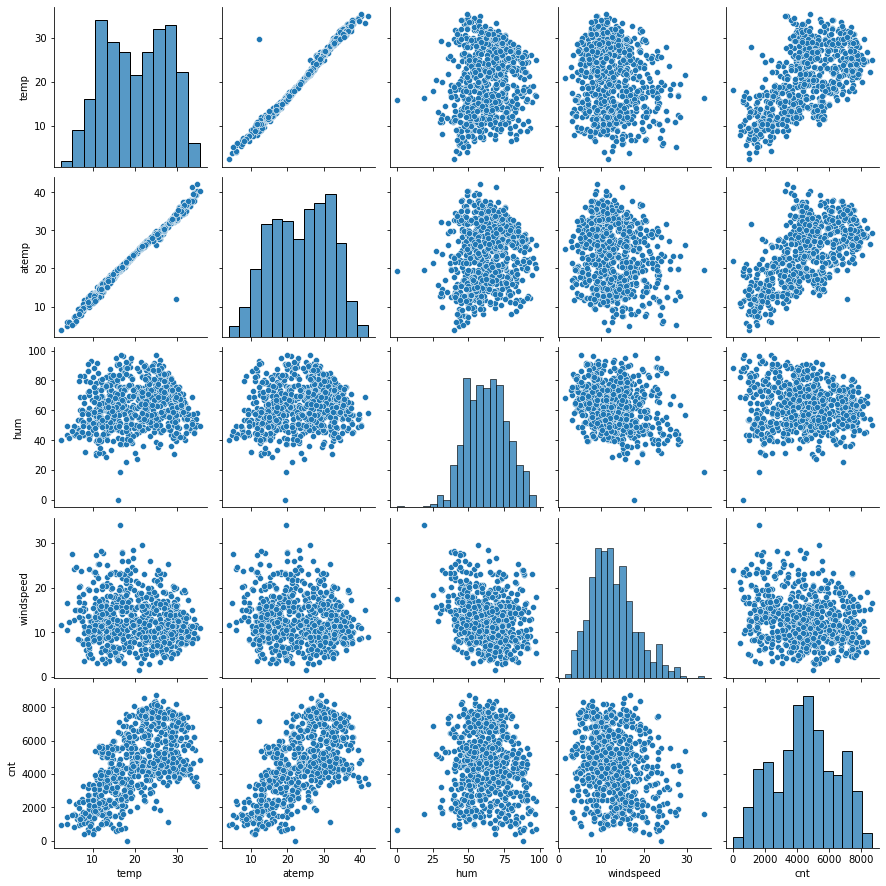

In [38]:
sns.pairplot(data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()


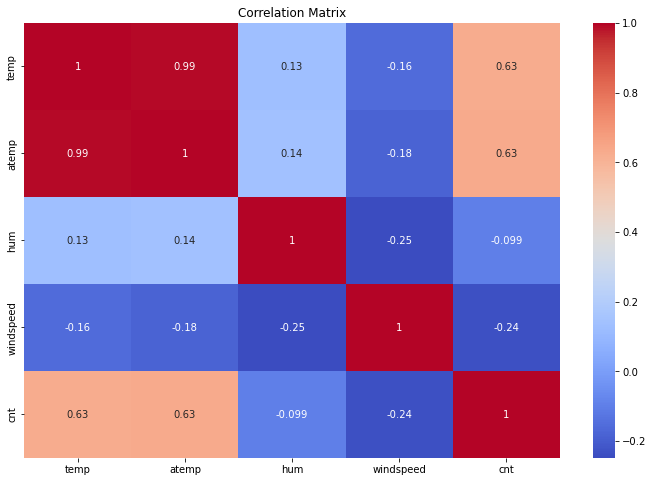

In [39]:
plt.figure(figsize=(12, 8))
corr_matrix = data_encoded[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Spliting The DataSet Into Training And Testing Sets

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [ ]:
#Adding a Constant To The Model

In [41]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

In [ ]:
#Initial MOdel Fitting to identify multicollinearity

In [42]:
model = sm.OLS(y_train,X_train_const).fit()

In [ ]:
#Calculating VIF for each feature

In [46]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]
print(vif_data)

                                              Feature         VIF
0                                               const  147.527231
1                                                temp  214.875238
2                                               atemp  198.084900
3                                                 hum    2.111833
4                                           windspeed    1.327410
5                                       season_spring   10.833605
6                                       season_summer    7.722281
7                                       season_winter    9.088092
8                                              mnth_2    1.728354
9                                              mnth_3    2.354638
10                                             mnth_4    6.077380
11                                             mnth_5    7.597110
12                                             mnth_6    8.121812
13                                             mnth_7   10.337969
14        

/Users/aniketsharma/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
#Droping Some Highly Collinear Variables

In [44]:
X_train_reduced = X_train_const.drop(columns=['holiday_Yes', 'workingday_Yes', 'temp', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'])
X_test_reduced = X_test_const.drop(columns=['holiday_Yes', 'workingday_Yes', 'temp', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'])

In [ ]:
#Recaluclating VIF

In [48]:
vif_data_reduced = pd.DataFrame()
vif_data_reduced['Feature'] = X_train_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_train_reduced.values, i) for i in range(X_train_reduced.shape[1])]
print("VIF after removing highly collinear variables:")
print(vif_data_reduced.sort_values(by='VIF', ascending=False))

VIF after removing highly collinear variables:
                                              Feature         VIF
0                                               const  134.404614
4                                       season_spring   10.748754
12                                             mnth_7    9.798597
6                                       season_winter    8.995129
13                                             mnth_8    7.883281
5                                       season_summer    7.676185
11                                             mnth_6    7.636207
10                                             mnth_5    7.411687
14                                             mnth_9    6.822150
1                                               atemp    6.438267
15                                            mnth_10    6.391419
9                                              mnth_4    6.022278
16                                            mnth_11    5.518503
17                           

In [ ]:
#Refiting the multiple linear Regression model with reduced features

In [49]:
model_reduced = sm.OLS(y_train,X_train_reduced).fit()

In [ ]:
#making predictions on the test set woth reduced features

In [50]:
y_pred_reduced = model_reduced.predict(X_test_reduced)

In [ ]:
#Evaluateing the reduced model

In [51]:
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)

In [52]:
# Summary of the reduced model
model_summary_reduced = model_reduced.summary()

print("\nModel Performance (Reduced Features):")
print(f"Mean Squared Error (MSE): {mse_reduced}")
print(f"R-squared (R²): {r2_reduced}")
print("\nModel Summary:")
print(model_summary_reduced)


Model Performance (Reduced Features):
Mean Squared Error (MSE): 533969.5870356759
R-squared (R²): 0.8439981769499505

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     136.4
Date:                Mon, 27 May 2024   Prob (F-statistic):          9.28e-205
Time:                        17:36:15   Log-Likelihood:                -4726.0
No. Observations:                 584   AIC:                             9496.
Df Residuals:                     562   BIC:                             9592.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                            